# Image segmentation
---

Grouping, or segmenting, images into distinct parts according to a set of features is known as image segmentation.

The simplest case for image segmentation is in background subtraction. In video and other applications, it is often the case that a human has to be isolated from a static or moving background, and so we have to use segmentation methods to distinguish these areas. Image segmentation is also used in a variety of complex recognition tasks, such as in classifying every pixel in an image of the road.

![Segmentation](images/image_segmentation.jpeg)

#### Basic imports

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import math

### Kmeans clustering
---

It's a machine learning technique that separates an image into segments by clustering or grouping together data points that have similar traits. K-means is called an unsupervised learning method which means you don't need to label data. Instead, unsupervised learning aims to group and characterize unlabeled datasets. And, in doing so, often identifies patterns and similarities in groups of data.

You can give k-means a set of any unlabeled data, like the pixel values in an image, and just tell it to break it into k clusters where k is a variable whose value you choose.

![Kmeans](images/k_means.png)

In [6]:
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.random.randint(25,85,(50,2))

data = np.vstack((X, Y, Z))

# convert to np.float32
data = np.float32(data)

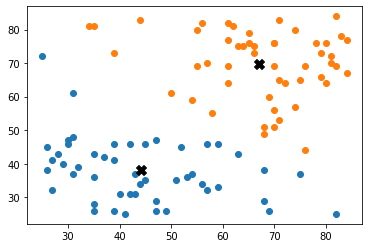

In [42]:
# define stopping criteria
# you can change the number of max iterations for faster convergence
# Iterations: The max amount of times the algorithms runs
# Epsilon: if the the clusters move less than this after some iteration, the algorithm stops
# ( type, max_iter, epsilon ):

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# ( samples, no. clusters, Input/output integer array that stores the cluster indices for every sample, criteria, attempts, how initial centers are taken )
ret, labels, centers=cv2.kmeans(data, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = data[labels.ravel()==0]
B = data[labels.ravel()==1]

# Plot the data
plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0], B[:,1])

plt.scatter( centers[:,0], centers[:,1], s = 100, c = 'black', marker = 'X')

plt.show()

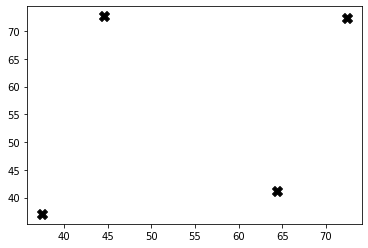

In [40]:
# TODO: Modifica el código para que, de manera automática, se visualizen los diferentes clusters al cambiar el número de clusters en la función kmeans.

# define criteria and apply kmeans(), ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# ( samples, no. clusters, Input/output integer array that stores the cluster indices for every sample, criteria, attempts, how initial centers are taken )
ret, labels, centers=cv2.kmeans(data, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

distinct_labels = list(set(labels.flatten()))

plt.scatter( centers[:,0], centers[:,1], s = 100, c = 'black', marker = 'X')

plt.show()

#### Load and display image

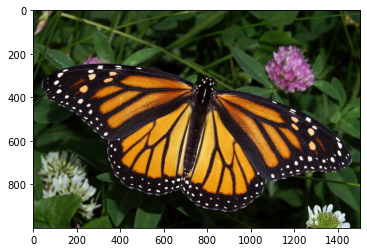

In [75]:
kmeans_image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
kmeans_image = cv2.cvtColor(kmeans_image, cv2.COLOR_BGR2RGB)
h, w, d = kmeans_image.shape
kmeans_image = cv2.resize(kmeans_image, (w//2, h//2))

plt.imshow(kmeans_image)

#### Prepare data for k-means

In [76]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
# pixel_vals = kmeans_image.reshape((-1,3))
pixel_vals = kmeans_image.reshape((kmeans_image.shape[0]*kmeans_image.shape[1],3))

print(pixel_vals.shape)

# Convert to float type
pixel_vals = np.float32(pixel_vals)

(1504000, 3)


#### Implement k-means clustering

In [117]:
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0)

k = 4
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

In [118]:
print(centers)

distinct_labels = list(set(labels.flatten()))
print(distinct_labels)

[[180.17645  165.82515  162.32834 ]
 [215.79562  144.55585   37.27242 ]
 [ 20.457817  23.826107  12.808474]
 [ 61.051     74.474495  38.146656]]
[0, 1, 2, 3]


(1000, 1504)


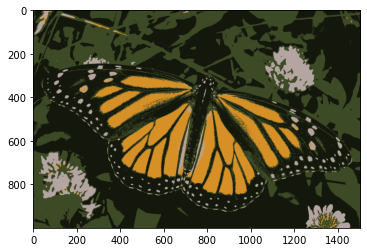

In [119]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((kmeans_image.shape))
labels_reshape = labels.reshape(kmeans_image.shape[0], kmeans_image.shape[1])

plt.imshow(segmented_image)
print(labels_reshape.shape)

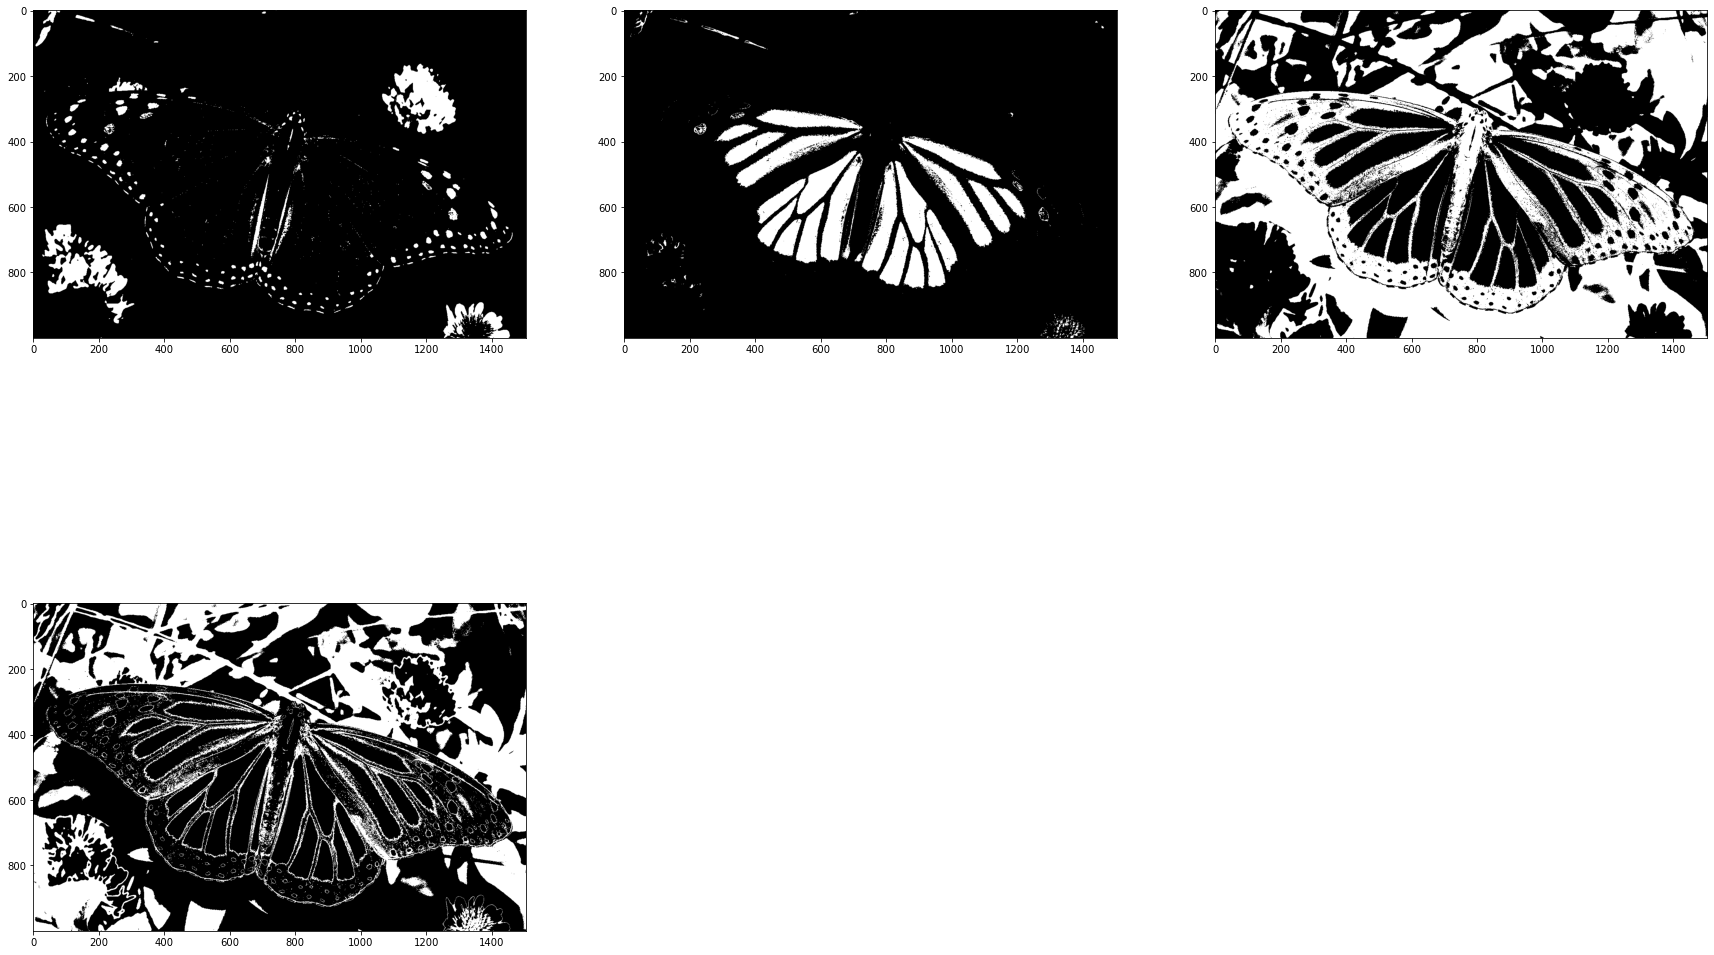

In [120]:
plt.figure(figsize=(30,20))
for i in range(len(distinct_labels)):
    plt.subplot(math.ceil(len(distinct_labels)/3), 3, i+1)
    image = labels_reshape==distinct_labels[i]
    plt.imshow(image, cmap='gray')
    
plt.show()


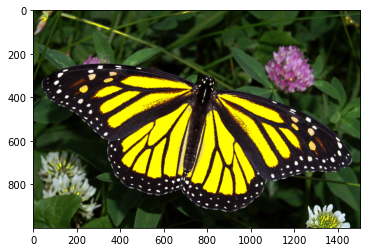

In [121]:
# mask an image segment by cluster

cluster = 1 # the first cluster

masked_image = np.copy(kmeans_image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [255, 255, 0]

plt.imshow(masked_image)

In [122]:
# TODO: Agrega una celda de código para, similar a la celda que muestra dónde están los diferentes colores, que se muestren solamente los colores de cada cluster. 